In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

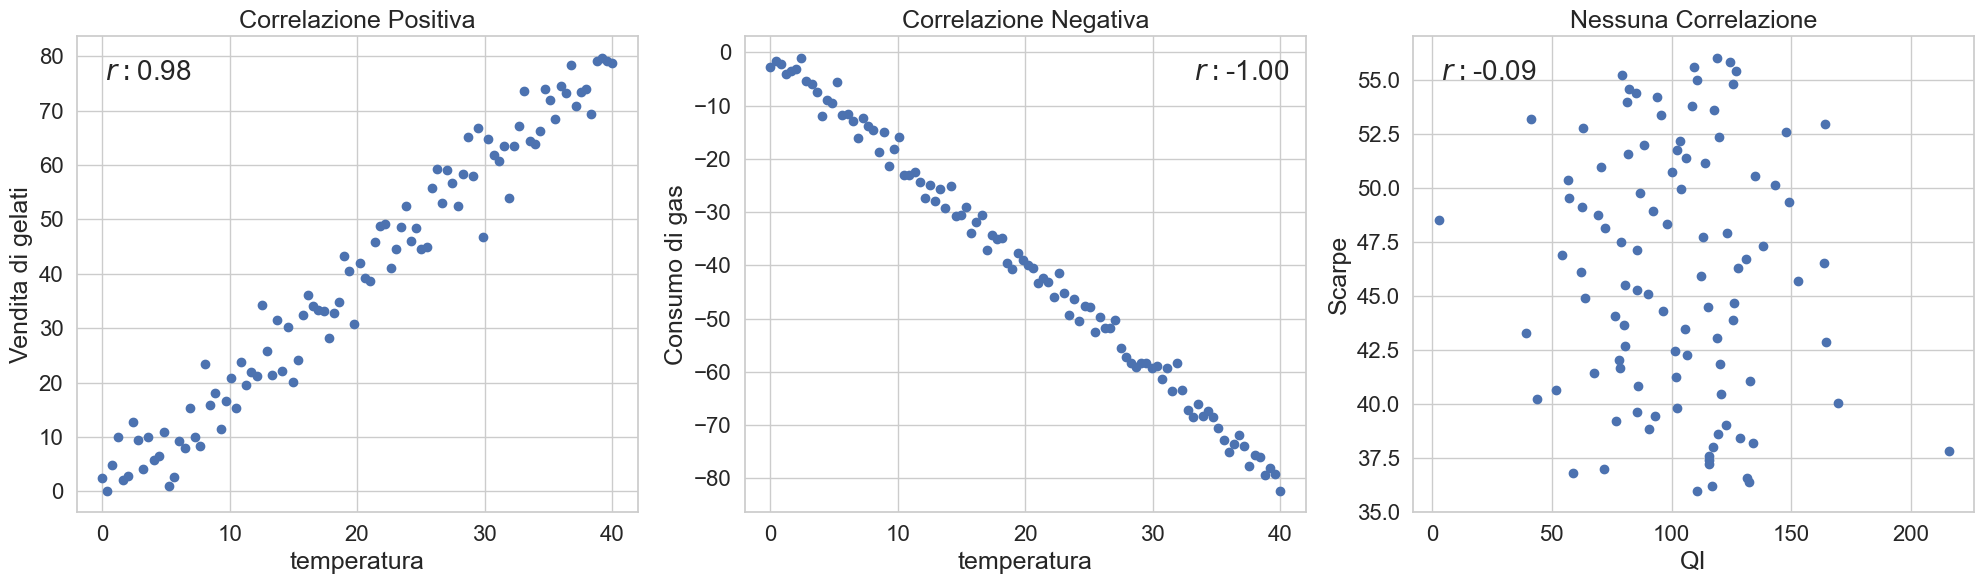

In [2]:

# Set the style
sns.set_theme(style="whitegrid")

#set plot parameters
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 12,
    'figure.figsize': (20, 6)
})

# Generate sample data
np.random.seed(42)
temperatura = np.linspace(0, 40, 100)

# Positive correlation
y_pos = 2 * temperatura + np.random.normal(0, 5, size=temperatura.shape)

# Negative correlation
y_neg = -2 * temperatura + np.random.normal(0, 2, size=temperatura.shape)

# No correlation
scarpe = np.linspace(36, 56, 100)
y_none = np.random.normal(100, 30 ,size=scarpe.shape)
#copmpute correlation
correlazione_pos = np.corrcoef(temperatura, y_pos)[0, 1]
correlazione_neg = np.corrcoef(temperatura, y_neg)[0, 1]
correlazione_none = np.corrcoef(scarpe, y_none)[0, 1]
# Create the plots
fig, axes = plt.subplots(1, 3)

# Positive correlation plot
axes[0].scatter(temperatura, y_pos)
axes[0].set_title('Correlazione Positiva')
axes[0].set_xlabel('temperatura')
axes[0].set_ylabel('Vendita di gelati')
#add correlation value to the plot
axes[0].text(0.05, 0.95, f'$r: ${correlazione_pos:.2f}', transform=axes[0].transAxes, fontsize=20, verticalalignment='top')

# Negative correlation plot
axes[1].scatter(temperatura, y_neg)
axes[1].set_title('Correlazione Negativa')
axes[1].set_xlabel('temperatura')
axes[1].set_ylabel('Consumo di gas')
axes[1].text(0.8, 0.95, f'$r: ${correlazione_neg:.2f}', transform=axes[1].transAxes, fontsize=20, verticalalignment='top')
# No correlation plot
axes[2].scatter(y_none, scarpe)
axes[2].set_title('Nessuna Correlazione')
axes[2].set_xlabel('QI')
axes[2].set_ylabel('Scarpe')
axes[2].text(0.05, 0.95, f'$r: ${correlazione_none:.2f}', transform=axes[2].transAxes, fontsize=20, verticalalignment='top')

plt.tight_layout()
plt.show()



In [3]:
#add an outlier to X in positive correlation
#generete outliers
import pandas as pd
from scipy.stats import rankdata, pearsonr,spearmanr


# Generate X values (e.g., from 0 to 10)
X = np.arange(0, 15, 1)  # giorni
Y = 1 * 2**(X)  # con un po' di rumore

# Assicuriamoci che nessun valore sia sotto 1 (non ha senso avere -ninfee)
Y[Y < 1] = 1


def spearman_rho_fnc(X, Y):
    """
    Calcola il coefficiente di correlazione di Spearman tra due array.
    """
    if len(X) != len(Y):
        raise ValueError("X e Y devono avere la stessa lunghezza.")
    
    # Calcolo dei ranghi
    rank_X = rankdata(X)
    rank_Y = rankdata(Y)
    
    # Calcolo Spearman
    d = rank_X - rank_Y
    d_squared = d ** 2
    n = len(X)
    
    return 1 - (6 * np.sum(d_squared)) / (n * (n**2 - 1))
spearman_rho= spearman_rho_fnc(X, Y)


rank_X = rankdata(X)
rank_Y = rankdata(Y)
d = rank_X - rank_Y
d_squared = d ** 2


# Calcolo Spearman
pearson_corr,_ = pearsonr(X, Y)



pearson_corr, spearman_rho





(0.6943915630580799, 1.0)

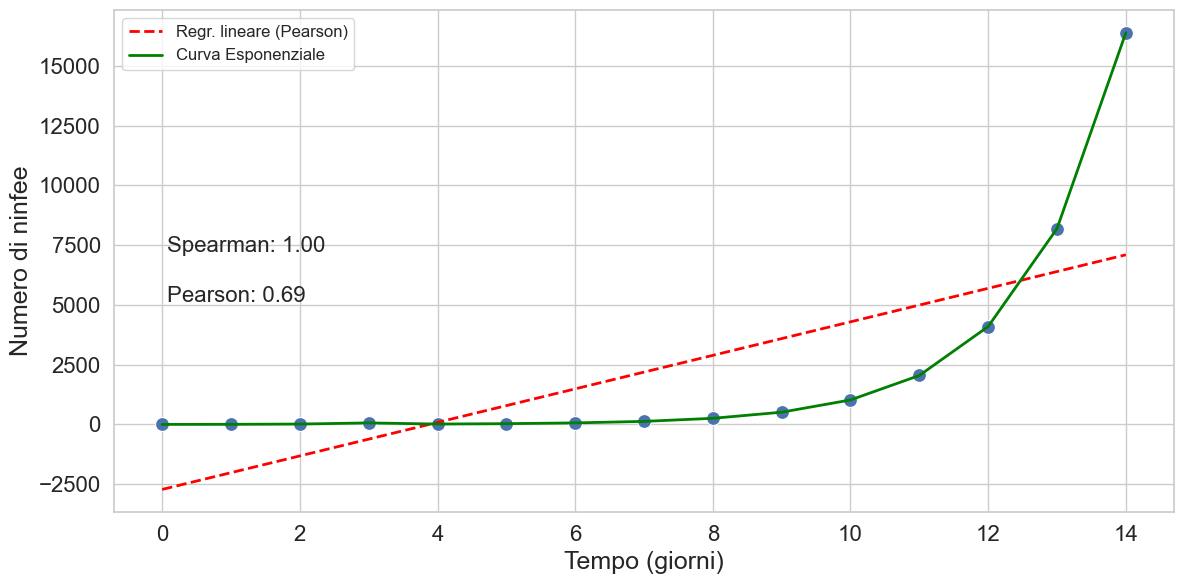

In [10]:
#fit a linear regression line
m, b = np.polyfit(X, Y, 1)
Y_fit = m * X + b


# Scatter plot dei dati
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X, y=Y, s=100)

# Aggiunta linea di regressione lineare (Pearson)
plt.plot(X, Y_fit, color='red', linestyle='--', linewidth=2, label='Regr. lineare (Pearson)')

# Aggiunta curva esponenziale 
plt.plot(X, Y, color='green', linestyle='-', linewidth=2, label='Curva Esponenziale')

# Testo con i coefficienti
plt.text(0.05, 0.45, f'Pearson: {pearson_corr:.2f}',
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.text(0.05, 0.55, f'Spearman: {spearman_rho:.2f}',
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.xlabel("Tempo (giorni)")
plt.ylabel("Numero di ninfee")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()